In [1]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
from mxnet import autograd, nd
import random

In [2]:
num_inputs = 2
num_examples = 1000
true_w = nd.array([2, -3.4])
true_b = 4.2
features = nd.random.normal(scale=1, shape=(num_examples, num_inputs))
labels = nd.dot(features, true_w) + true_b
labels += nd.random.normal(scale=0.01, shape=labels.shape)

In [3]:
features[0], labels[0]

(
 [1.1630785 0.4838046]
 <NDArray 2 @cpu(0)>, 
 [4.879625]
 <NDArray 1 @cpu(0)>)

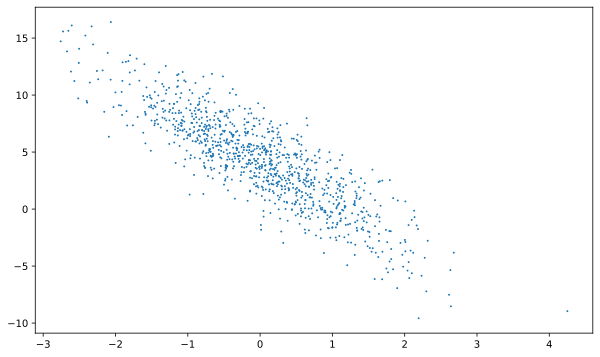

In [4]:
def use_svg_display():
    # Display in vector graphics
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # Set the size of the graph to be plotted
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
plt.figure(figsize=(10, 6))
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);

In [5]:
# This function has been saved in the d2l package for future use
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The example are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)
        # The "take" function will then return the corresponding element based
        # on the indices

In [6]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break


[[-1.1688148   1.558071  ]
 [ 2.4302444   0.05513682]
 [-0.04867768  1.739093  ]
 [-1.8929878   1.3092364 ]
 [-1.6635175   0.25828022]
 [ 0.05416771 -1.2120364 ]
 [-0.81632394  0.7855458 ]
 [-0.5558463  -0.440662  ]
 [ 0.57413304  0.7544733 ]
 [-1.6730411  -0.48454127]]
<NDArray 10x2 @cpu(0)> 
[-3.4331114   8.877103   -1.8206078  -4.0245347  -0.02414168  8.418317
 -0.11465154  4.5954723   2.7880225   2.4986048 ]
<NDArray 10 @cpu(0)>


In [7]:
w = nd.random.normal(scale=0.01, shape=(num_inputs, 1))
b = nd.zeros(shape=(1,))

In [8]:
w.attach_grad()
b.attach_grad()

In [9]:
# This function has been saved in the d2l package for future use
def linreg(X, w, b):
    return nd.dot(X, w) + b

In [10]:
# This function has been saved in the d2l package for future use
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [11]:
# This function has been saved in the d2l package for future use
def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

In [13]:
lr = 0.03 # Learning rate
num_epochs = 3 # Number of iterations
net = linreg # Our fancy linear model
loss = squared_loss # 0.5 (y-y')^2

for epoch in range(num_epochs):
    # Assuming the number of examples can be divided by the batch size, all
    # the examples in the training data set are used once in one epach
    # iteration. The features and tags of mini-batch examples are given by X
    # and y respectively
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(net(X, w, b), y) # Minibatch loss in X and y
        l.backward() # Compute gradient on l with respect to [w, b]
        sgd([w, b], lr, batch_size)
    train_l = loss(net(features, w, b), labels)
    print(f'epoch {epoch + 1}, loss {train_l.mean().asnumpy()}')

epoch 1, loss [0.00012387]
epoch 2, loss [4.847346e-05]
epoch 3, loss [4.8300222e-05]


In [14]:
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)

Error in estimating w 
[4.2510033e-04 7.8439713e-05]
<NDArray 2 @cpu(0)>
Error in estimating b 
[-0.00018978]
<NDArray 1 @cpu(0)>
